# Проектная работа по A/B - тестированию для интернет магазина с целью увеличения его прибыли 
Проект состоит из двух частей. Во-первых, нам надо провести приоритизацию гипотез на датасете /datasets/hypothesis.csv с применением фреймворков ICE и RICE, и сделать вывод, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло. Во-вторых, провести A/B - тестирование, где на основе кумулятивных данных проведем исследования групп, вырчки, среднего чека, построим графики и сделаем выводы, а также для подготвоки итога нам поможет вычисление перцентицелей (с целью уточнения данных о покупках/заказах). 

**Цель проектной работы:** Ознакомиться с данными, определить приоритет гипотез на основе данных фреймворках и провести полный A/B-тест с последующим написанием вывода

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option("max_colwidth", 150)
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [4]:
#Проведм приоритезацию гипотез по фреймворку ICE
pd.set_option("max_colwidth", 150)
data['ICE'] = round(data['impact'] * data['confidence'] / data['efforts'], 2)
data[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод:** По фреймворку ICE можно сделать вывод, что в топ3 гипотез по изменению в интернет магазине входят гипотезы 8,0,7. Также у них наблюдается ICE больше 10, что заметно больше, чем у других, где самое большое значение в первой десятке 8

In [5]:
#Проведм приоритезацию гипотез по фреймворку RICE 
pd.set_option("max_colwidth", 150)
data['RICE'] = round(data['reach'] * data['impact'] * data['confidence'] / data['efforts'], 2)
data[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:** По приоритезации гипотез фреймворка RICE видно "гипотезу лидер", у которой RICE перешел показеть в 100, это гипотеза 7. Стоит отметить, что RICE делает упор на охват пользователей, а гипотеза 7, как раз на прямую влияет на кол-во охваченных пользователей, дальше идут с большим отстованием гипотезы 2 с результатом 56 и 0 с результатом 40

**Вывод в сравнение ICE и RICE:** Итак, если делать один итоговый вывод по двум фреймворкам, то с уверенностью можем выдвигать на первый тест гипотезу №7, потому что она есть как в ICE, так и в RICE, конечно, показатели там совсем разные, но и данные фреймворки направленны на разное. В ICE мы оцениваем насколько сильно изменение повлияет на пользователей с приложенными усилиями и затратами на реализацию данной гипотезы, а в фреймворке RICE мы ещё включаем как ключевой метрикой охваты. И если смотреть по составляющим показателям, то во-первых, стоимость проведения данной гипотезы не самая большая, она является средней и по совместительству медианной ценной, что в целом приемлимый показатель. Во-вторых, уверенность в благоприятном исходе отданно 8 баллов, что является отличным показателем, в-третьих, показатель изменения, которое окажет на пользователей тоже на хорошем, близким к идеальному показателю уровню - 7 баллов. И, наконец, в-четвертых, скольких пользователей затронет, то тут эталонный показатель 10. Если дать комментарий по остальным гипотезам, то в тройку лидеров RICE вошла гипотеза 0, которая также есть в ICE, а вот 8 к сожалению находится на 5 месте, и тут я бы рекомендовал, во-первых, отталкиваться от двух гипотез (7 и 0), а дальше уже исходят из отдельных показателей каждой гипотезы, но по моему мнению, если будут реализованны 7 и 0 гипотеза, то лучше отталкиваться от целей, потому что в гипотезе 6 и 2 влияние на пользователей низкое (3 балла), зато отсальные показаетли хорошие, а вот в гипотезе 8 нет почти влияние на пользователей, зато стоимость, измение, которое коснется пользователей и стоимость на отличном уровне

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

In [8]:
orders

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [9]:
#проверка на пропуски
orders.isnull().sum()

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

In [10]:
orders.duplicated().sum()

0

In [11]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [12]:
visitors.columns = visitors.columns.str.lower().str.replace(' ', '_')

In [13]:
#проверка на пропуски
visitors.isnull().sum()

date        0
group       0
visitors    0
dtype: int64

In [14]:
orders.duplicated().sum()

0

In [15]:
#найдем кол-во покупателей в каждой группе
group_a = visitors[visitors['group'] == 'A']['visitors'].sum()
group_b = visitors[visitors['group'] == 'B']['visitors'].sum()

print('Численность группы A:', group_a)
print('Численность группы B:', group_b)

Численность группы A: 18736
Численность группы B: 18916


In [16]:
#минимальная и маскимальная дата исследования

max_date = visitors['date'].max()
min_date = visitors['date'].min()

print('Максимальная дата исследования:', max_date)
print('Минимальная дата исследования:', min_date)

Максимальная дата исследования: 2019-08-31
Минимальная дата исследования: 2019-08-01


In [17]:
#кол-во пользователей в обеих группах
dup = orders['visitorid'].nunique() 
print('Кол-во пользователей оказавшихся по разным причинам в двух группах одновременно:', orders['visitorid'].count() - dup)



Кол-во пользователей оказавшихся по разным причинам в двух группах одновременно: 166


У нас находится две группы на тесте

In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [20]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


# Часть №2

**Пункт 1. Выручка по группам**

Text(0, 0.5, 'Выручка')

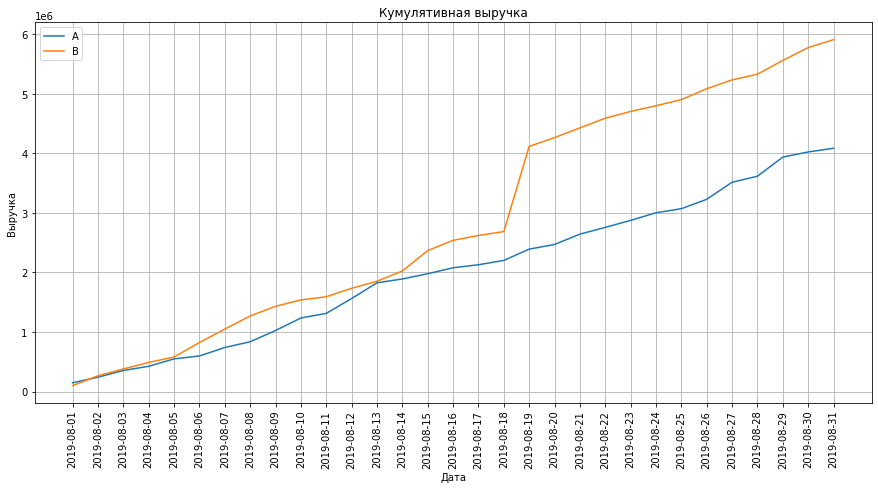

In [21]:
#соберм кумулятивные данные
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]


# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

#построение графика
plt.figure(figsize=(15, 7))
plt.xticks(rotation=90)
plt.grid()
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A');

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B');
plt.legend();
plt.title('Кумулятивная выручка')
plt.xlabel('Дата')
plt.ylabel('Выручка')

**Вывод:** По графику мы можем выдеть, что выручка группы А и В растет постепенно до 2019-08-18, а в этот день выручка группы В резко возрасла, можно сделать предположение, что в это день и последующие было много заказов

**Пункт 2. Средний чек по группам**

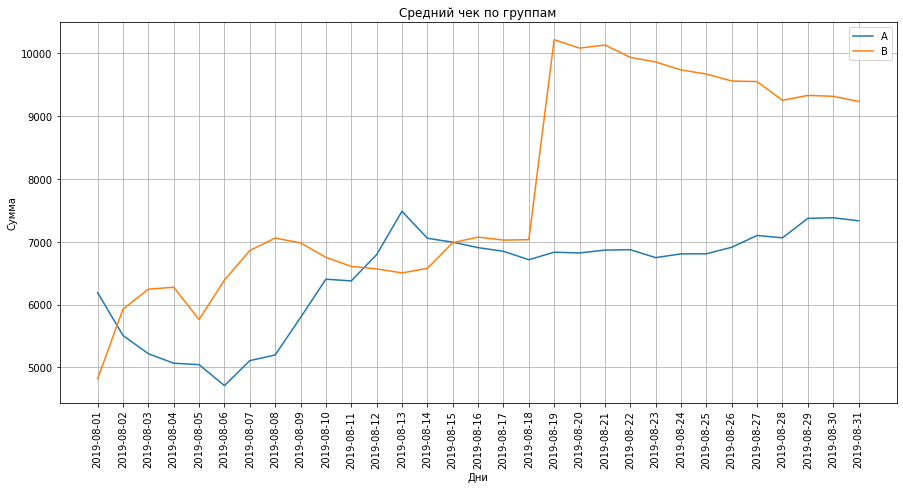

In [22]:
#график кумулятивных данных среднего чека 
plt.figure(figsize = (15, 7))
plt.xticks(rotation = 90)
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Средний чек по группам')
plt.xlabel('Дни')
plt.ylabel('Сумма')
plt.legend();


**Вывод:** Ориентируюсь на график среднего чека, можем сделать вывод о том, что динамика у группы А более менее хорошая, при том, что есть коллебания, он после 2019-08-13 становится более стабильным. А вот средний чек группы В более нестабильный. Как и было помнятно, после 2019-08-18 средний чек возрос, но не после начал падать, и до этого дня его динамика была непредсказуемой

**Пункт 3. Средний чек группы В к А**


Text(0, 0.5, 'Отношение среднего чека группы В к А')

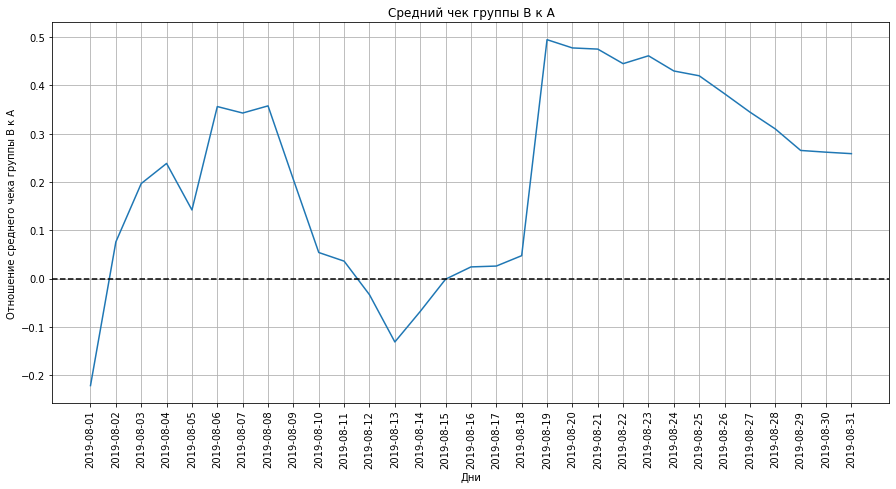

In [23]:
#график относительного изменение кумулятивного средненго чека
plt.figure(figsize=(15, 7))
plt.xticks(rotation=90)
plt.grid()
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');
plt.title('Средний чек группы В к А')
plt.xlabel('Дни')
plt.ylabel('Отношение среднего чека группы В к А')

**Вывод:** График отношения сильно меняется на временном промежутке относительно нуля. Можем сделать выводы, что есть место аномальным значениям

**Пункт 4. Конверсия**

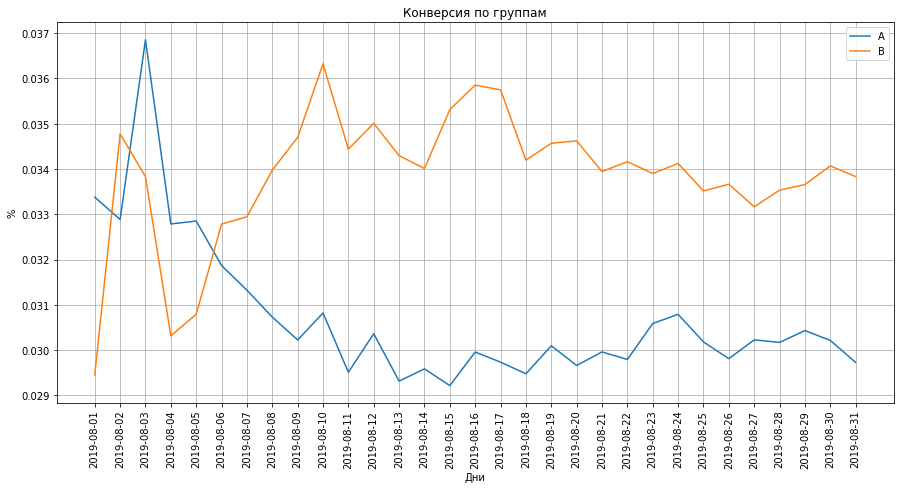

In [24]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 7))
plt.xticks(rotation=90)
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Конверсия по группам')
plt.xlabel('Дни')
plt.ylabel('%')
plt.legend();


**Вывод:** График конвесрии по определенного дня имеет сильные колебания, у группы A, это до 2019-08-09, дальше он становится более менее стабильным, конечно, конверсия скачет и находится на низком уровне, но в общей картине график хороший. У группы B эта, так назовем "нестабильность" продолжалась до 2019-08-10, до этого дня конвесрия то сильно росла, то сильно падала, но дальгше установилась примерно на одном уровне и показывала хороший результат. В общем выводе можно скзать то, что скачки вначале могли свидетельствовать о выбросах значений

**Пункт 5. Изменение среднего к посетителю**

(0.0, 30.0, -0.5, 0.5)

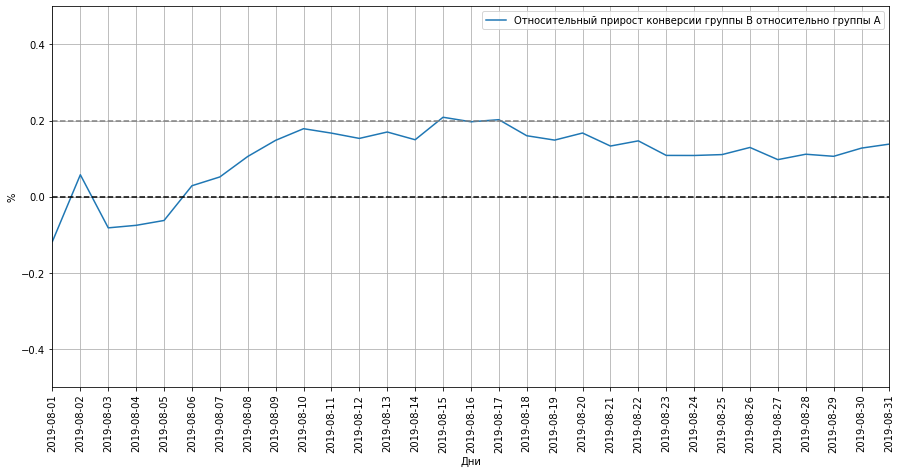

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 7))
plt.xticks(rotation=90)
plt.grid()
plt.xlabel('Дни')
plt.ylabel('%')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend();

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])


**Вывод:** По графику мы можем видеть, что группа В на одном из промежутков времени была хуже группы А (2019-08-01 - 2019-08-06 (ориентировочно)) но после начала расти и в какой-то момент преодолела отметку разницу в 20% и дальше показывает хороший стабильный результат примерно 10-15 процентов разницы с группой А

**Пункт 6. Точечный график кол-ва заказво к пользователям**

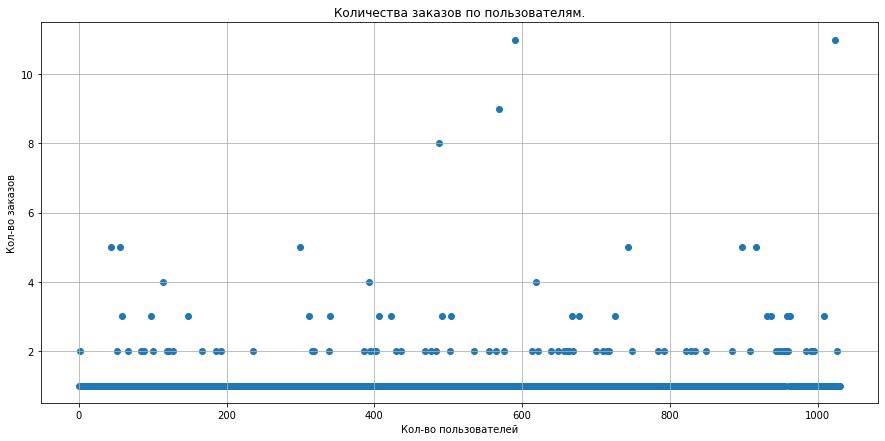

In [26]:
ordersbyusers = (orders.groupby('visitorid', as_index = False).agg({'transactionid' : 'nunique'}))
ordersbyusers.columns = ['userid', 'transactionid']
#print(ordersbyusers.sort_values(by = 'transactionid', ascending = False).head(10))

x_values = pd.Series(range(0,len(ordersbyusers)))
plt.figure(figsize=(15, 7))
#plt.xticks(rotation=90)
plt.grid()
plt.title('Количества заказов по пользователям.')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов')
plt.scatter(x_values, ordersbyusers['transactionid']);

**Вывод:** На точечном графике можем видеть, что подавляющее большинство пользователей с 1 заказом, есть так же пользователи с 2 заказами, но их существенно меньше, потом 3 (их не больше 20) 4 и более, но я бы их считал аномальными, так как составляют меньшую часть 

**Пункт 7. 95-й и 99-й перцентиль количества заказов на пользователя**

In [27]:
print(np.percentile(ordersbyusers['transactionid'], [95, 99])) 

[2. 4.]


**Вывод:** По получившимся данным можно сделать заключение, что не более 5% пользователей совершают от 2 покупок, а не более 1% пользовтелей совершают от 4 покупок. Можем установить границу в 2 и 4 заказов, а остальные отсеивать.

**Пункт 8. График стоимостей заказов**

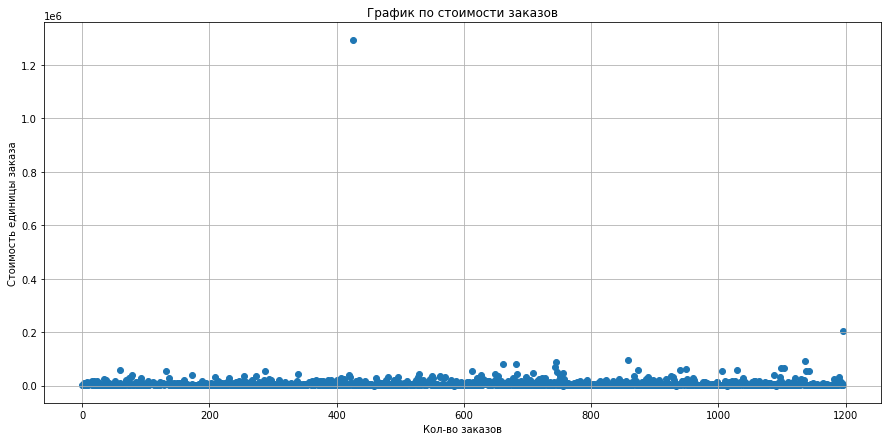

In [28]:
plt.figure(figsize=(15, 7))
#plt.xticks(rotation=90)
plt.grid()
plt.title('График по стоимости заказов')
plt.xlabel('Кол-во заказов')
plt.ylabel('Стоимость единицы заказа')
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

**Вывод:** На графике можем видеть, что стоимость не превышает 7'000-10'000 рублей, есть, конечно, аномальные значение, такие как более 1,2 млн. руб.

**Пункт 9. Перцентили стоимости заказов**

In [29]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


In [30]:
display(orders['revenue'].min())
orders['revenue'].max()

50

1294500

**Вывод:** По получившимся данным можно сделать заключение, что не более 5% пользователей совершают покупок от 28'000 руб, а не более 1% пользовтелей совершают покупок от 58'233.2 руб. Можем установить границу в 28'000 - 58'233.2, а остальные отсеивать. Так же дополнительно я вывел манимальный заказ в 50 руб. и максимальный аж в 1'294'500 руб., что поможет нам в целом увидеть картину по покупкам. Конечно, заказ за 1,3 млн. руб. является единичным, но все же он влияет на значения прецентилей

**Подготовим гипотезы для дальнейшей работы с ними**

Гипотезы: 

*Нулевая гипотеза: Статистически значимых различий в среднем количестве заказов на посетителя между группами нет.*

*Альтернативная гипотеза: Статистически значимые различия в среднем количестве заказов на посетителя между группами есть*

Уровень статистической значимости возьмем 0,05

**Пункт 10. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

In [31]:
ordersbyusersa = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersbyusersa.columns = ['visitorid', 'orders']

ordersbyusersb = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersbyusersb.columns = ['visitorid', 'orders']


sampleA = pd.concat([ordersbyusersa['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersbyusersa['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersbyusersb['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersbyusersb['orders'])), name='orders')],axis=0)
print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Относительный прирост: 0.138


**Вывод:** Число p-value меньше 0,05 => нулевую гипотезу о том, что стат. значимых различий в среднем числе заказов между группами нет, отвергаем. А так же следует заметить, что относительный вигрыш группы B над группой A составил 14% (огругленно).

**Пункт 11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным**

In [32]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729
Относительный прирост: 0.259


**Вывод:** Значение p-value значительно больше 0,05 => нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, тоже нет. И видно, что средний чек группы B в значительную степень выше среднего чека группы A 

**Пункт 12. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**

In [33]:
usersWithManyOrders = pd.concat(
    [
        ordersbyusersa[ordersbyusersa['orders'] > 4]['visitorid'],
        ordersbyusersb[ordersbyusersb['orders'] > 4]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitorid, dtype: int64
53


**Вывод:** Всего 53 аномальных пользователя, и так же можем увидеть их часть, 5 строк таблицы с аномальными пользователями


In [34]:
sampleAFiltered = pd.concat(
    [
        ordersbyusersa[
            np.logical_not(ordersbyusersa['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersbyusersa['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersbyusersb[
            np.logical_not(ordersbyusersb['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersbyusersb['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.019
Относительный прирост: 0.144


**Вывод:** По "очищенным" данным тоже можно наблюдать различие между группой В и А, все тоже самое, что и по "сырым". Так же статистическая значимость (p-value) меньше альфы, значит мы можем опровергнуть нулевуб гипотезу альтернативой

*Нулевая гипотеза:* Статистически значимых различий в среднем чеке заказов между группами по "очищенным" данным нет

*Альтернативная гипотеза:* Статистически значимые различия в среднем чеке заказов между группами по "очищенным" данным есть

**Пункт 13. Статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

In [35]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
      np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'],orders[
      np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'],)[1]))

print("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
      np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'].mean() / orders[
      np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'].mean()- 1))

0.979
-0.017


**Вывод:** P-value увеличился, следовательно отвергать нашу нулевую гипотезу нет прчины. Разница между сегментами сократилась с 26% до 1%.

**Пункт 14. Решение по результатам теста**

Принимаю решение завершить тест и зафиксировать победу группы B, так как кол-во заказов больше у группы В на 14% и средний чек у группы В больше на 26% 

# Итоговй вывод

**Приоритизация гипотез**

Вывод в сравнение ICE и RICE. Проведя тестирование и сравненеи гипотез, я смог выявить несколько выигрышных гипотез и одну, которая соотвествует двум фреймворкам, различие в которых по охватам. Итак, Гипотзе, которые стали победителями из ICE и RICE, это гипотезы 0,2,6 и 8. Они подходят в целом по всем параметрам, которые описаны во фреймворках, у них и низкая цена реализации, большой охват и не большой риск, а так же уверенность в успешном реализации. Но, есть и победитель, который был на первом месте по анализу во фреймворке RICE и на третьем месте во фреймворке ICE, что тоже довольно хороший уровень, и это гипотеза под номером 7 "Добавить форму подписки на все основные страницы". Данная гипотеза лидирует по всем показателям, например, оценка охвата пользователей составляет эталонные все 10 баллов, также влияние на пользователей и увереннсоть в реализации оценивалось в отличные 7 и 8 баллов, и последнее, но не мало важное оценка затрат на реализацию данной гипотезы, то это всего 5, что находится на среднем уровне затрат (если судить по шкале оценивания). 

**Анализ A/B-теста**

Проведя A/B-тестирование и оценив возможные показатели: конверсию, кол-во заказов по "сырым" и "очищенным" данным, а так же различия в средниз чеках, я смог оценить две гипотезы, и стоит ли отвергать их. В конечном результате получился результат, что группа B показывает намного лучше результат чем, группа A, что в целом видно по различиям в кол-ве заказов, эта разница составляет 14% и в средних чеках, где разница составляла 26%. Ранее перечисленные показатели позволяют сделать заключение, что группа B является выигрышной 